In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from statsmodels.tsa.stattools import adfuller

In [36]:
# Load and clean data
raw_path = Path("../data/data-raw")
tickers = ["TSLA", "BND", "SPY"]
dfs = {}

In [37]:
for ticker in tickers:
    df = pd.read_csv(raw_path / f"{ticker}.csv", index_col=0)

    if df.index[0] == "Ticker":
        df = df.iloc[1:]

    df.index = pd.to_datetime(df.index, errors='coerce')
    df.index.name = 'Date'
    df = df[df.index.notna()]

    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df = df.sort_index().asfreq("B").fillna(method="ffill")
    dfs[ticker] = df

C:\Users\Win 10 Pro\AppData\Local\Temp\ipykernel_29416\3276081694.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index, errors='coerce')
C:\Users\Win 10 Pro\AppData\Local\Temp\ipykernel_29416\3276081694.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.sort_index().asfreq("B").fillna(method="ffill")
C:\Users\Win 10 Pro\AppData\Local\Temp\ipykernel_29416\3276081694.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index, errors='coerce')
C:\Users\Win 10 Pro\AppData\Local\Temp\ipykernel_29416\3276081694.py:14: FutureWarning: DataFrame.fillna with '

In [38]:
# 1. Basic Statistics
for t, df in dfs.items():
    print(f"\n=== {t} Basic Stats ===")
    print(df.describe())


=== TSLA Basic Stats ===
         Adj Close        Close         High          Low         Open  \
count  2631.000000  2631.000000  2631.000000  2631.000000  2631.000000   
mean    132.320009   132.320009   135.307819   129.183352   132.331943   
std     121.280388   121.280388   124.140665   118.348093   121.366455   
min       9.578000     9.578000    10.331333     9.403333     9.488000   
25%      18.989667    18.989667    19.327000    18.605333    18.924334   
50%      95.384003    95.384003    99.983330    92.389336    95.666664   
75%     236.991661   236.991661   241.291664   232.334999   236.121666   
max     479.859985   479.859985   488.540009   457.510010   475.899994   

             Volume  
count  2.631000e+03  
mean   1.139845e+08  
std    7.288973e+07  
min    1.062000e+07  
25%    6.908220e+07  
50%    9.510450e+07  
75%    1.322551e+08  
max    9.140820e+08  

=== BND Basic Stats ===
         Adj Close        Close         High          Low         Open  \
count  263

In [26]:
for ticker in tickers:
    # Read CSV normally first
    df = pd.read_csv(raw_path / f"{ticker}.csv", index_col=0)

    # If index contains 'Ticker' (bad header row), drop that row
    if df.index[0] == "Ticker":
        df = df.iloc[1:]


In [27]:
# Convert index to datetime
df.index = pd.to_datetime(df.index, errors='coerce')

C:\Users\Win 10 Pro\AppData\Local\Temp\ipykernel_29416\3755944897.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index, errors='coerce')


In [31]:
print(df.index)
print(df.index.name)  # Should output 'Date' if set correctly

DatetimeIndex([       'NaT', '2015-07-01', '2015-07-02', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
               '2015-07-13', '2015-07-14',
               ...
               '2025-07-17', '2025-07-18', '2025-07-21', '2025-07-22',
               '2025-07-23', '2025-07-24', '2025-07-25', '2025-07-28',
               '2025-07-29', '2025-07-30'],
              dtype='datetime64[ns]', name='Date', length=2536, freq=None)
Date


In [39]:
# 2. Calculate daily returns
returns = pd.DataFrame()
for t, df in dfs.items():
    returns[t] = df["Adj Close"].pct_change()


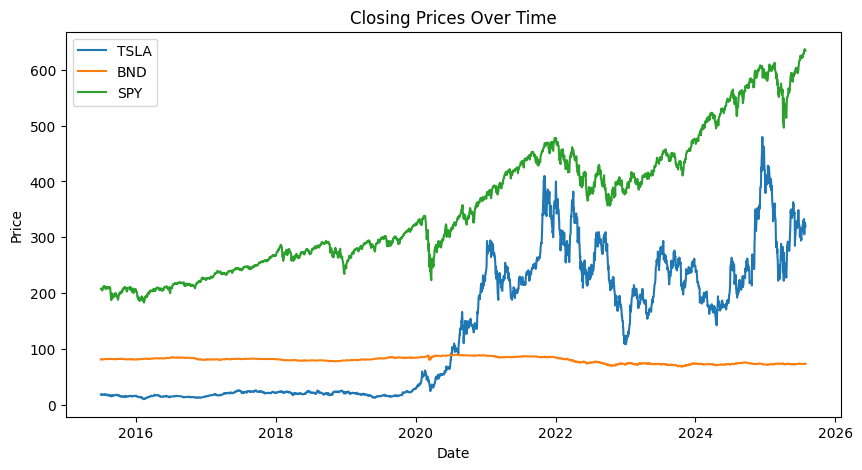

In [40]:
 # 3. Plot closing prices
plt.figure(figsize=(10,5))
for t in tickers:
    plt.plot(dfs[t].index, dfs[t]["Close"], label=t)
plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

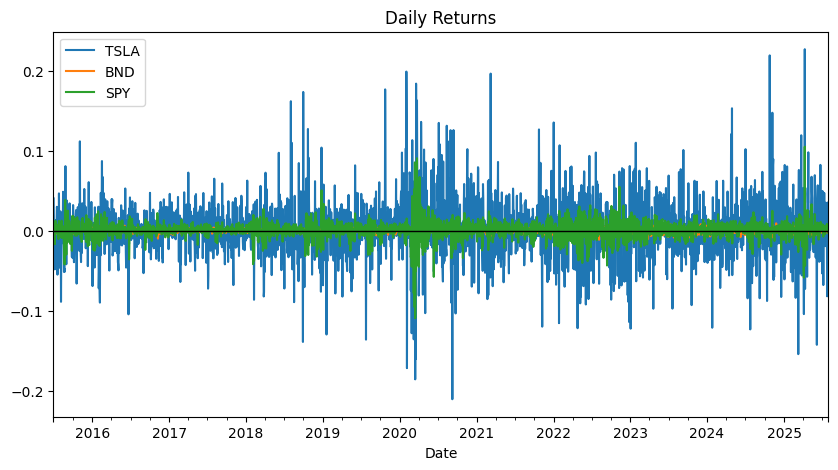

In [41]:
# 4. Plot daily returns
returns.plot(figsize=(10,5), title="Daily Returns")
plt.axhline(0, color='black', linewidth=1)
plt.show()

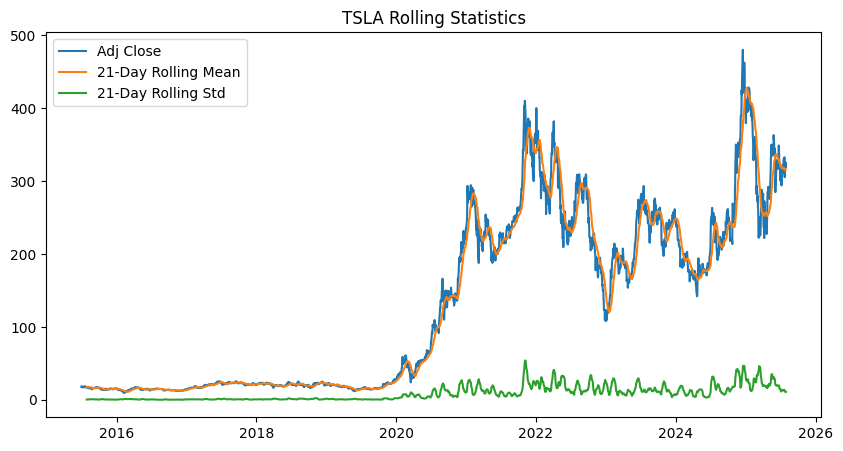

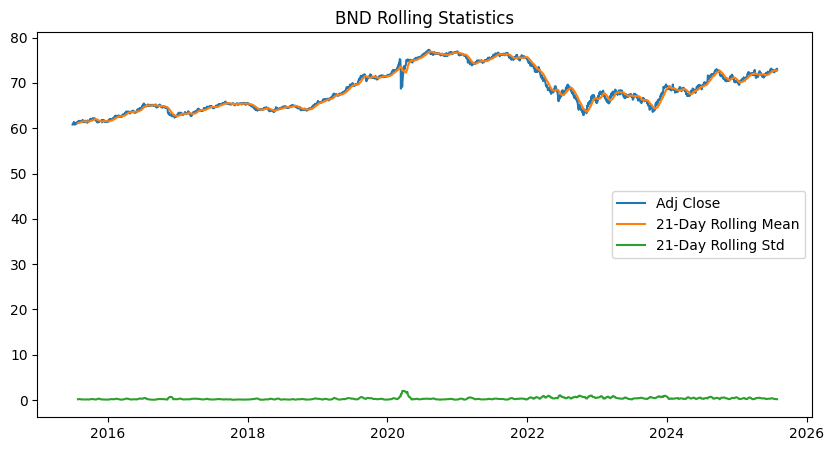

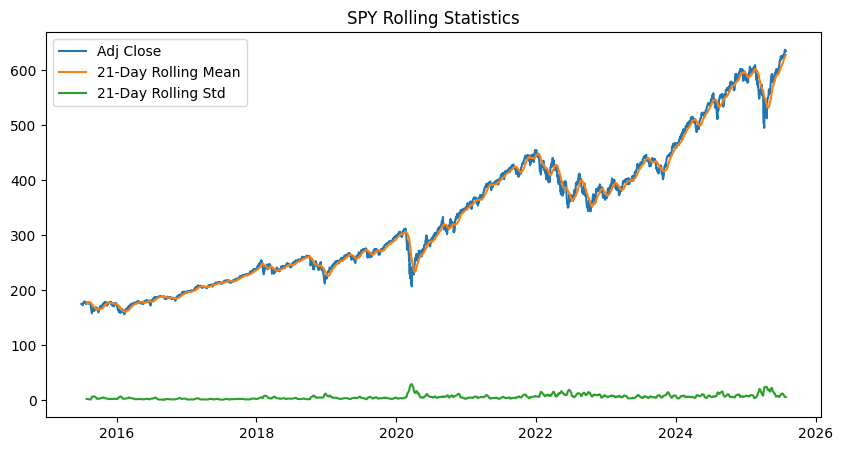

In [42]:
# 5. Rolling mean & std (volatility)
rolling_window = 21  # ~1 month of trading days
for t in tickers:
    rolling_mean = dfs[t]["Adj Close"].rolling(rolling_window).mean()
    rolling_std = dfs[t]["Adj Close"].rolling(rolling_window).std()
    plt.figure(figsize=(10,5))
    plt.plot(dfs[t].index, dfs[t]["Adj Close"], label="Adj Close")
    plt.plot(rolling_mean, label=f"{rolling_window}-Day Rolling Mean")
    plt.plot(rolling_std, label=f"{rolling_window}-Day Rolling Std")
    plt.title(f"{t} Rolling Statistics")
    plt.legend()
    plt.show()

In [43]:
# 6. Outlier detection (based on returns)
for t in tickers:
    outliers = returns[(returns[t] > 0.05) | (returns[t] < -0.05)][t]
    print(f"\n=== {t} Outliers (>5% change) ===")
    print(outliers)


=== TSLA Outliers (>5% change) ===
Date
2015-07-21   -0.054879
2015-08-06   -0.088846
2015-08-20   -0.051205
2015-08-24   -0.051567
2015-08-27    0.080724
                ...   
2025-06-10    0.056744
2025-06-23    0.082319
2025-07-01   -0.053359
2025-07-07   -0.067893
2025-07-24   -0.081970
Name: TSLA, Length: 335, dtype: float64

=== BND Outliers (>5% change) ===
Date
2020-03-12   -0.054385
Freq: B, Name: BND, dtype: float64

=== SPY Outliers (>5% change) ===
Date
2018-12-26    0.050525
2020-03-09   -0.078095
2020-03-10    0.051745
2020-03-12   -0.095677
2020-03-13    0.085486
2020-03-16   -0.109424
2020-03-17    0.053992
2020-03-18   -0.050633
2020-03-24    0.090604
2020-03-26    0.058390
2020-04-06    0.067167
2020-06-11   -0.057649
2022-11-10    0.054954
2025-04-04   -0.058543
2025-04-09    0.105019
Name: SPY, dtype: float64


In [44]:
# 7. Stationarity Test
def adf_test(series, name):
    result = adfuller(series.dropna())
    print(f"\nADF Test for {name}")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Stationary" if result[1] < 0.05 else "Non-stationary")

for t in tickers:
    adf_test(dfs[t]["Adj Close"], f"{t} Adj Close")
    adf_test(returns[t], f"{t} Returns")


ADF Test for TSLA Adj Close
ADF Statistic: -1.4825
p-value: 0.5422
Non-stationary

ADF Test for TSLA Returns
ADF Statistic: -15.6416
p-value: 0.0000
Stationary

ADF Test for BND Adj Close
ADF Statistic: -1.5742
p-value: 0.4965
Non-stationary

ADF Test for BND Returns
ADF Statistic: -19.9011
p-value: 0.0000
Stationary

ADF Test for SPY Adj Close
ADF Statistic: 0.8215
p-value: 0.9920
Non-stationary

ADF Test for SPY Returns
ADF Statistic: -13.5943
p-value: 0.0000
Stationary


In [45]:
# 8. Risk metrics
risk_metrics = {}
rf_rate = 0.01  # example: 1% annual risk-free rate

for t in tickers:
    mean_return = returns[t].mean()
    std_return = returns[t].std()
    sharpe_ratio = (mean_return - rf_rate/252) / std_return
    var_95 = np.percentile(returns[t].dropna(), 5)

    risk_metrics[t] = {
        "Mean Daily Return": mean_return,
        "Std Dev": std_return,
        "Sharpe Ratio": sharpe_ratio,
        "VaR 95%": var_95
    }

risk_df = pd.DataFrame(risk_metrics).T
print("\n=== Risk Metrics ===")
print(risk_df)


=== Risk Metrics ===
      Mean Daily Return   Std Dev  Sharpe Ratio   VaR 95%
TSLA           0.001761  0.036600      0.047042 -0.053353
BND            0.000075  0.003396      0.010381 -0.004810
SPY            0.000554  0.011279      0.045580 -0.016886


In [46]:
processed_path = Path("../data/processed")
processed_path.mkdir(parents=True, exist_ok=True)

for ticker, df in dfs.items():
    df.to_csv(processed_path / f"{ticker}_cleaned.csv")